In [1]:
import numpy as np                                # python library for numerical functions
import pandas as pd                               # for making dataframes
import scipy.stats as stats                       # library for statistics functions like probability etc
import statsmodels.api as sm                      # python library for stats models
import matplotlib.pyplot as plt                   # to plot charts
%matplotlib inline
import sklearn                                    # python library for linear models & others
from sklearn.linear_model import LinearRegression # import the Linear Regression object

The training set was sanitized by filling the missing values taking each city one by one, i.e. select 1 city, then fill missing value of each parameter accordingly.
It was observed that Age_of_Unit avg. & Star_Rating mode value did not change with change in city

In [2]:
#Loading data from manually sanitized csv file
data = pd.read_csv('/content/train_data.csv')
data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.50,6579.15,43,1873.5,3,3,5,0,1.720,31.333333,Cairo,2863.295221,1.924
1,506848,Window,1.10,6775.44,46,1603.8,4,4,1,0,18.000,29.500000,Bucharest,2783.309698,1.341
2,441027,Portable,3.80,6995.22,29,4807.0,38,4,1,0,0.551,13.763158,Berlin,2882.606418,2.702
3,160677,Window,1.20,1863.68,39,1466.4,10,4,0,0,19.540,22.900000,Cape Town,2607.089566,1.541
4,902932,Window,2.76,3089.04,40,3139.4,9,5,4,0,16.760,18.444444,Berlin,2681.359161,2.182


# Exploratory Data Analysis

In [3]:
#Finding out how many unique cities are considered in the dataset
data['City'].unique()

array(['Cairo', 'Bucharest', 'Berlin', 'Cape Town', 'Moscow', 'Delhi',
       'Sao Paolo', 'New York', 'Geneva', 'Mumbai', 'Tokyo', 'Prague',
       'Seoul'], dtype=object)

In [4]:
countries=data['City'].unique()
countries

array(['Cairo', 'Bucharest', 'Berlin', 'Cape Town', 'Moscow', 'Delhi',
       'Sao Paolo', 'New York', 'Geneva', 'Mumbai', 'Tokyo', 'Prague',
       'Seoul'], dtype=object)

Annotating the dataset into European&African countries and Asian courntries to analyze better

In [5]:

eur_afr_countries=['Cairo','Bucharest','Berlin','Cape Town','Moscow','Geneva','Prague']
amer_countries=['Sao Paolo','New York']
asia_countries=['Delhi','Mumbai','Tokyo','Seoul']
data['country'] = data['City']
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
for i in range(len(eur_afr_countries)):
  data.loc[data["country"] == eur_afr_countries[i],"country"]="European"


In [6]:
for j in range(len(amer_countries)):
  data.loc[data["country"] == amer_countries[j],"country"]="American"

for k in range(len(asia_countries)):
  data.loc[data["country"] == asia_countries[k],"country"]="Asian"

In [7]:
data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC,country
0,795823,Split,1.50,6579.15,43,1873.5,3,3,5,0,1.720,31.333333,Cairo,2863.295221,1.924,European
1,506848,Window,1.10,6775.44,46,1603.8,4,4,1,0,18.000,29.500000,Bucharest,2783.309698,1.341,European
2,441027,Portable,3.80,6995.22,29,4807.0,38,4,1,0,0.551,13.763158,Berlin,2882.606418,2.702,European
3,160677,Window,1.20,1863.68,39,1466.4,10,4,0,0,19.540,22.900000,Cape Town,2607.089566,1.541,European
4,902932,Window,2.76,3089.04,40,3139.4,9,5,4,0,16.760,18.444444,Berlin,2681.359161,2.182,European


In [8]:
data.info() #the data taken has already been sanitized manually in csv before loading

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       15000 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  int64  
 5   Room_SIze                   15000 non-null  float64
 6   Num_People                  15000 non-null  int64  
 7   Star_Rating                 15000 non-null  int64  
 8   Age_of_Unit                 15000 non-null  int64  
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        15000 non-null  object 
 13  Input_Power                 150

In [9]:
data.shape

(15000, 16)

In [10]:
cols = data.columns
print(cols)
object_list = []
for item in cols:
  if data[item].dtypes == object:
    object_list.append(item)
    data[item] = data[item].str.strip()
print("The columns having object dtype is : ",object_list)

Index(['ID', 'Type_of_AC', 'Model', 'Cooling_Capacity', 'Avg_Temp',
       'Room_SIze', 'Num_People', 'Star_Rating', 'Age_of_Unit', 'Maintenance',
       'Avg_Usage', 'Avg_AC_Temp', 'City', 'Input_Power',
       'Electricity_Consumption_AC', 'country'],
      dtype='object')
The columns having object dtype is :  ['Type_of_AC', 'City', 'country']


In [11]:
data.isnull().sum()

ID                            0
Type_of_AC                    0
Model                         0
Cooling_Capacity              0
Avg_Temp                      0
Room_SIze                     0
Num_People                    0
Star_Rating                   0
Age_of_Unit                   0
Maintenance                   0
Avg_Usage                     0
Avg_AC_Temp                   0
City                          0
Input_Power                   0
Electricity_Consumption_AC    0
country                       0
dtype: int64

**Feature Analysis**

In [12]:
corrmatrix = data.corr()
corrmatrix

<ipython-input-12-36756f7e16a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,Input_Power,Electricity_Consumption_AC
ID,1.000000,-0.000907,0.004613,-0.000388,-0.001510,-0.003925,0.016712,0.003226,-0.002489,0.003317,-0.006406,0.000658,-0.004102
Model,-0.000907,1.000000,0.045085,0.005330,0.493622,0.234942,-0.003649,0.011027,0.007676,-0.001005,-0.190249,0.065832,0.271430
Cooling_Capacity,0.004613,0.045085,1.000000,-0.005778,0.093894,0.042525,-0.018827,-0.007889,0.003462,-0.001847,-0.023029,0.361827,0.313614
Avg_Temp,-0.000388,0.005330,-0.005778,1.000000,0.008442,0.002126,0.004281,0.000478,-0.009124,0.159162,0.101801,-0.011140,0.255194
Room_SIze,-0.001510,0.493622,0.093894,0.008442,1.000000,0.432819,-0.008341,0.006792,0.001105,0.004957,-0.336882,0.105987,0.504569
Num_People,-0.003925,0.234942,0.042525,0.002126,0.432819,1.000000,0.009538,-0.001191,0.003025,0.005828,-0.325061,0.051546,0.263947
Star_Rating,0.016712,-0.003649,-0.018827,0.004281,-0.008341,0.009538,1.000000,0.007685,0.004478,0.001209,0.000913,-0.006616,-0.220842
Age_of_Unit,0.003226,0.011027,-0.007889,0.000478,0.006792,-0.001191,0.007685,1.000000,0.010515,-0.000468,-0.007294,-0.004400,0.213117
Maintenance,-0.002489,0.007676,0.003462,-0.009124,0.001105,0.003025,0.004478,0.010515,1.000000,-0.000761,-0.007717,0.002267,0.211604
Avg_Usage,0.003317,-0.001005,-0.001847,0.159162,0.004957,0.005828,0.001209,-0.000468,-0.000761,1.000000,0.008971,-0.008073,0.162203


<ipython-input-13-805aa3d8e84c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


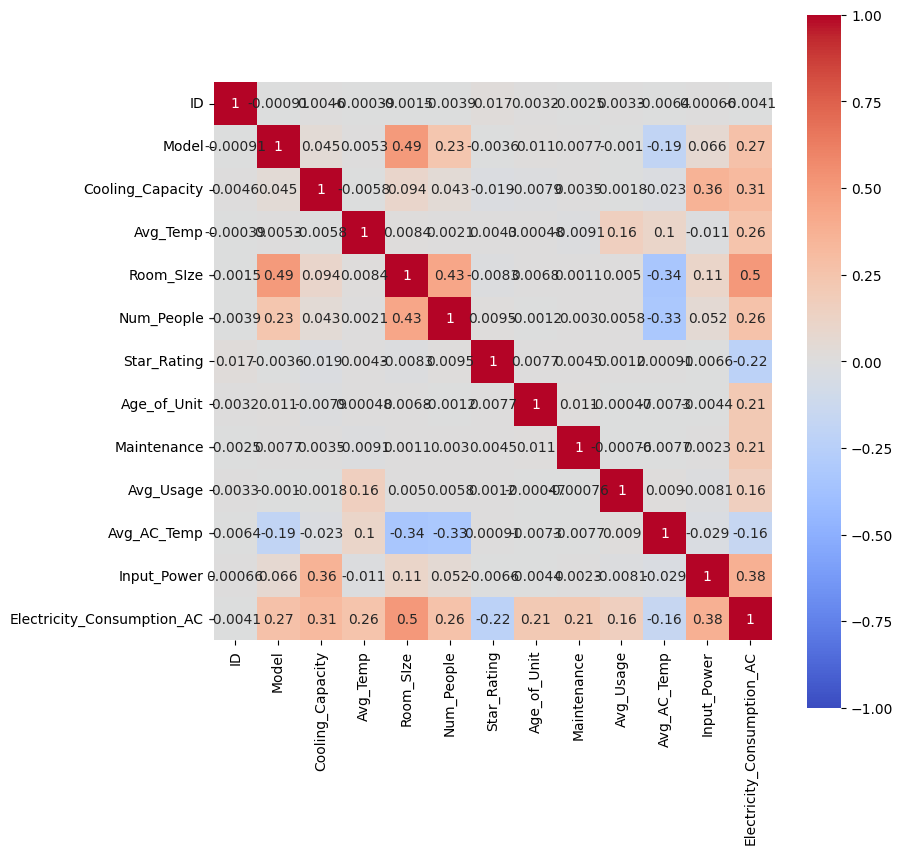

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# creating a correlation matrix
corrmatrix = data.corr()
plt.figure(figsize=(9,9))
# sns.heatmap(correlations, square = True, cmap="YlGnBu", annot=True)
sns.heatmap(corrmatrix, square = True, cmap='coolwarm', annot=True, vmax = 1, vmin = -1)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Visualizing the most correlated parameters and check for any outliers

1.   Changes in Electricity consumed to the AC model being used
2.   Changes in Electricity consumed to the AC cooling capacity
3.   Changes in Electricity consumed to the AC avg temperature set in the AC



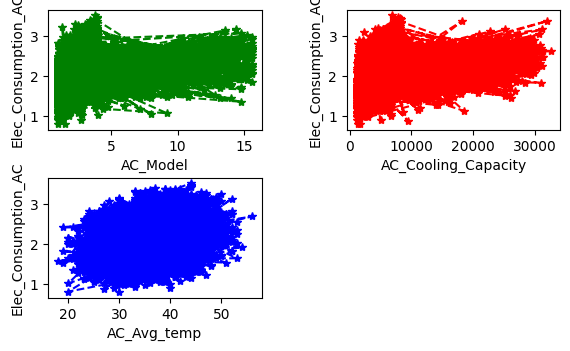

In [ ]:
plt.subplot(3,2,1)
plt.plot(data['Model'],data['Electricity_Consumption_AC'],color='green',marker='*',linestyle='dashed')
plt.xlabel('AC_Model')
plt.ylabel('Elec_Consumption_AC')

plt.subplot(3,2,2)
plt.plot(data['Cooling_Capacity'],data['Electricity_Consumption_AC'],color='red',marker='*',linestyle='dashed')
plt.xlabel('AC_Cooling_Capacity')
plt.ylabel('Elec_Consumption_AC')

plt.subplot(3,2,3)
plt.plot(data['Avg_Temp'],data['Electricity_Consumption_AC'],color='blue',marker='*',linestyle='dashed')
plt.xlabel('AC_Avg_temp')
plt.ylabel('Elec_Consumption_AC')

plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

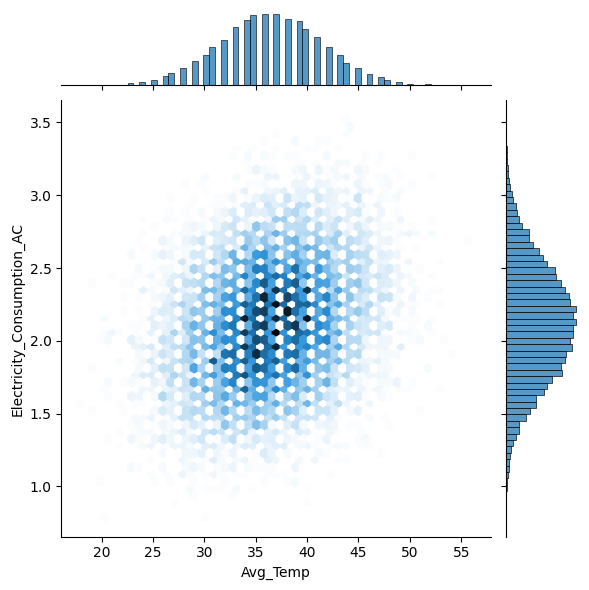

In [14]:
sns.jointplot(x='Avg_Temp',y='Electricity_Consumption_AC',data=data,kind='hex')

Text(0.5, 1.05, 'Region-Wise Electricity Consumption')

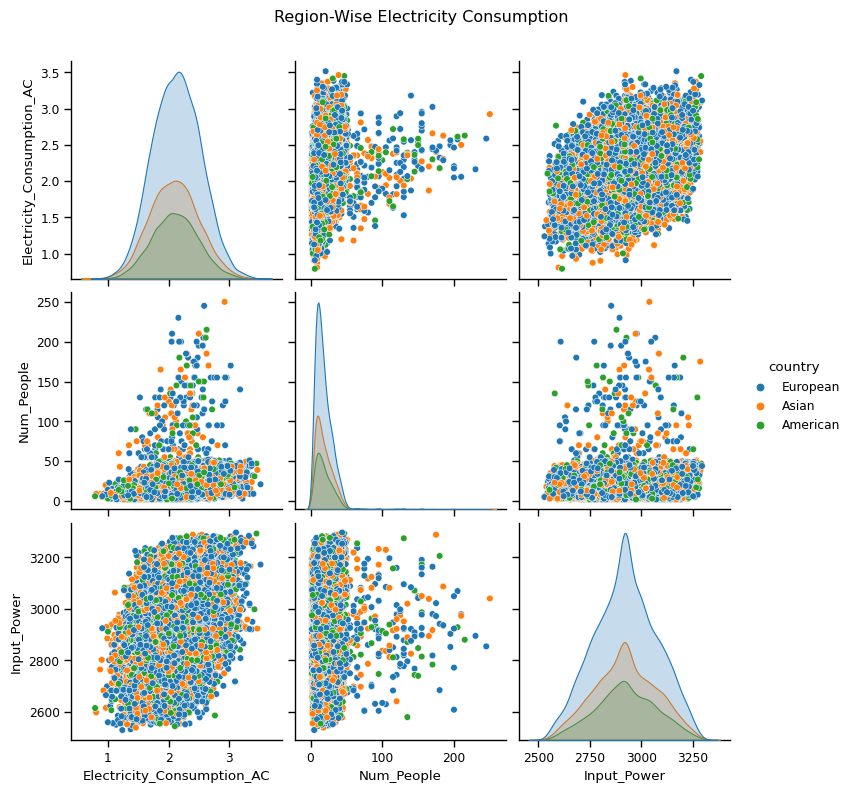

In [24]:
#sns.set_context("paper", rc={"figure.figsize": (5, 3)})
sns.pairplot(data[['Electricity_Consumption_AC','country','Num_People','Input_Power']],hue='country').fig.suptitle('Region-Wise Electricity Consumption',y=1.05)

Data Visualization of electricity consumption by European and African countries' AC users and how various factors affect the same.

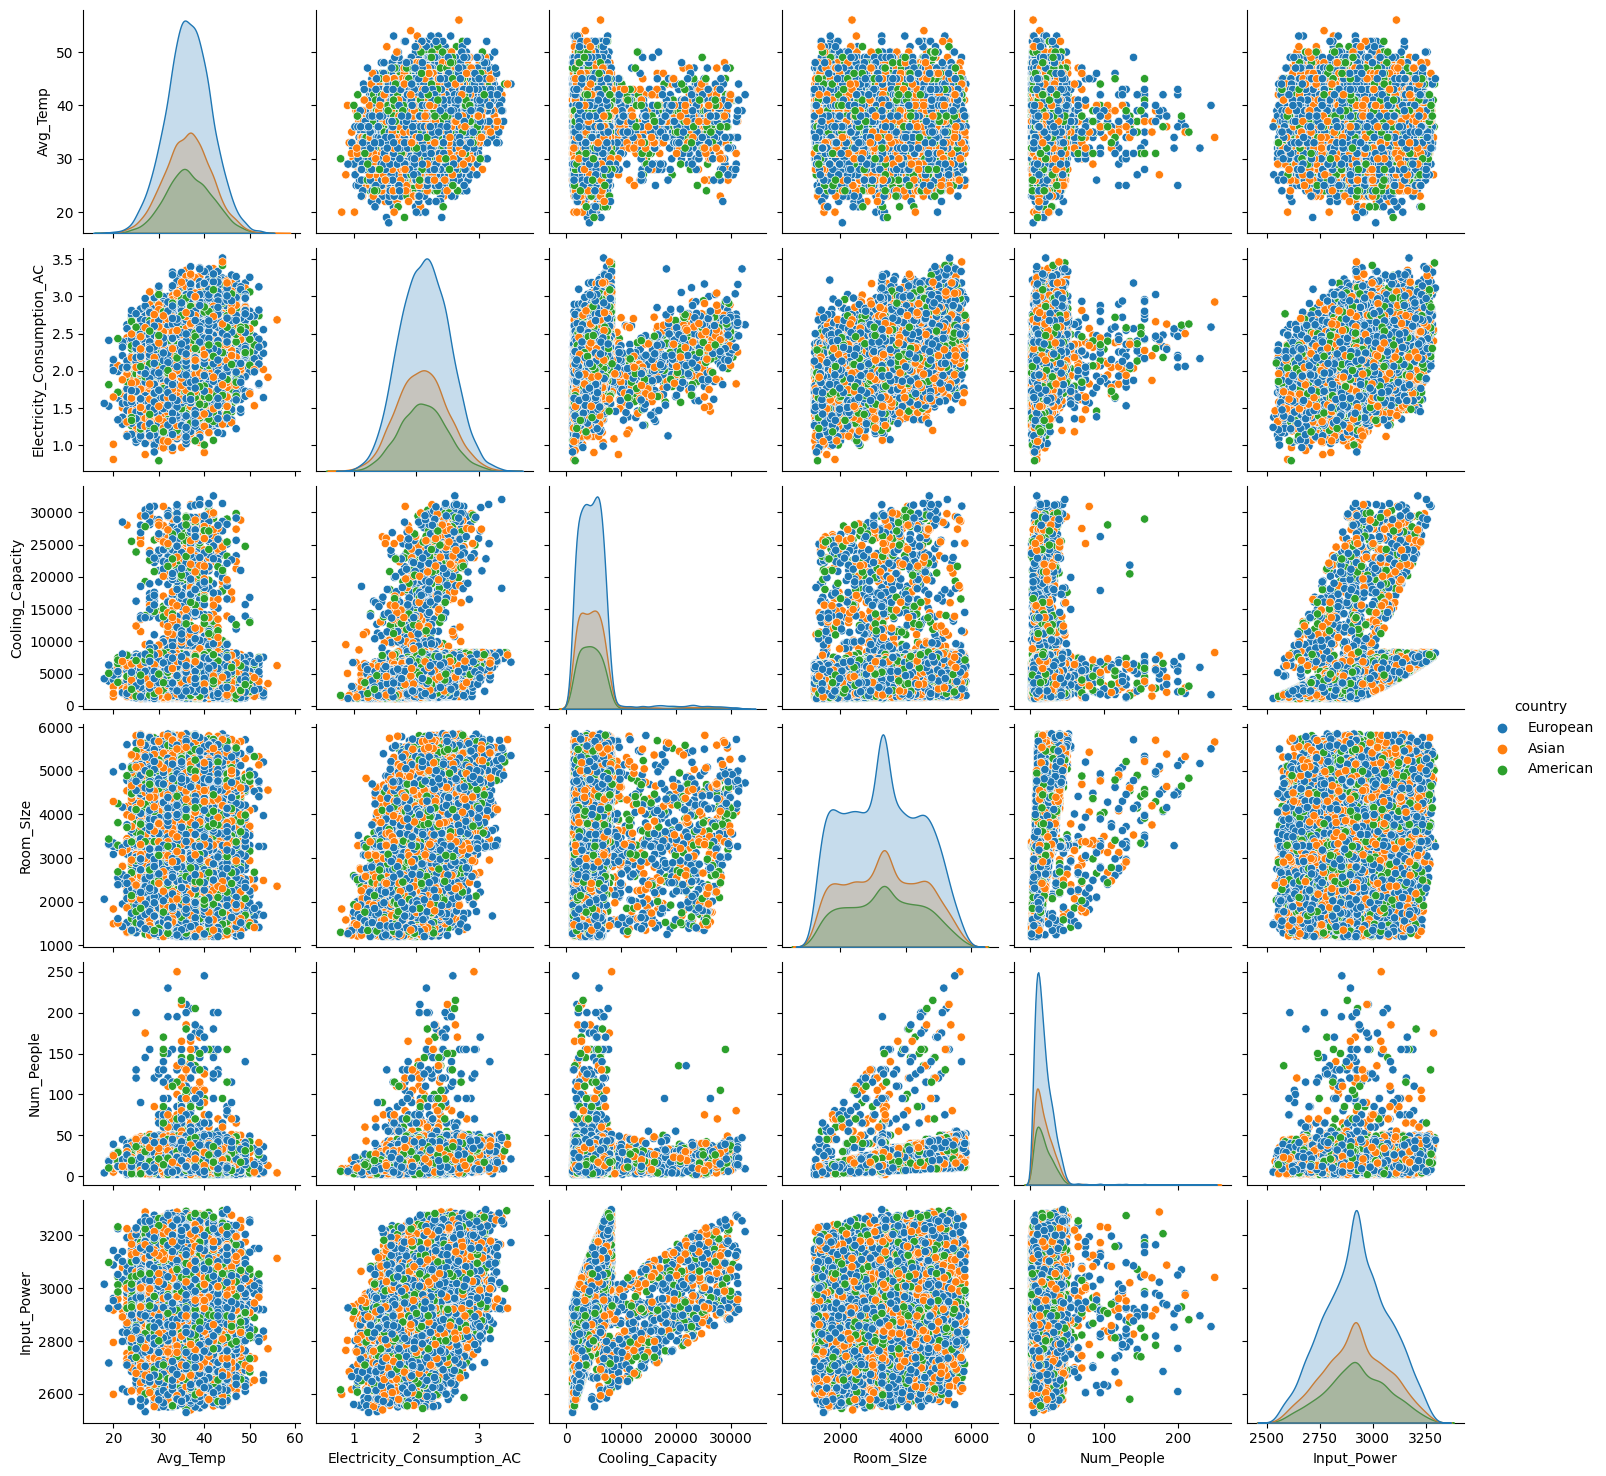

In [ ]:
sns.pairplot(data[['Avg_Temp','Electricity_Consumption_AC','Cooling_Capacity','Room_SIze','Num_People','Input_Power','country']],hue='country')

# Feature Engineering

In [ ]:
data['Type_of_AC'] = data['Type_of_AC'].replace({'Split':'Split','Ducted':'Ducted','Window':'Window','Portable':'Portable'})

# Convert all categorical variable in Origin into binary column -> Using One Hot Encoding
data = pd.get_dummies(data, columns = ['Type_of_AC'])
data.head(3)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC,country,Type_of_AC_Ducted,Type_of_AC_Portable,Type_of_AC_Split,Type_of_AC_Window
0,795823,1.5,6579.15,43,1873.5,3,3,5,0,1.720,31.333333,Cairo,2863.295221,1.924,European,0,0,1,0
1,506848,1.1,6775.44,46,1603.8,4,4,1,0,18.000,29.500000,Bucharest,2783.309698,1.341,European,0,0,0,1
2,441027,3.8,6995.22,29,4807.0,38,4,1,0,0.551,13.763158,Berlin,2882.606418,2.702,European,0,1,0,0


In [ ]:
data['City'] = data['City'].replace({'Berlin':'Berlin','Bucharest':'Bucharest','Cairo':'Cairo','Cape Town':'Cape Town','Delhi':'Delhi','Geneva':'Geneva','Moscow':'Moscow','Mumbai':'Mumbai','New York':'New York','Prague':'Prague','Sao Paolo':'Sao Paolo','Seoul':'Seoul','Tokyo':'Tokyo'})
# Convert all categorical variable in Origin into binary column -> Using One Hot Encoding
data = pd.get_dummies(data, columns = ['City'])
data.head(10)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,...,City_Cape Town,City_Delhi,City_Geneva,City_Moscow,City_Mumbai,City_New York,City_Prague,City_Sao Paolo,City_Seoul,City_Tokyo
0,795823,1.50,6579.15,43,1873.5,3,3,5,0,1.720,...,0,0,0,0,0,0,0,0,0,0
1,506848,1.10,6775.44,46,1603.8,4,4,1,0,18.000,...,0,0,0,0,0,0,0,0,0,0
2,441027,3.80,6995.22,29,4807.0,38,4,1,0,0.551,...,0,0,0,0,0,0,0,0,0,0
3,160677,1.20,1863.68,39,1466.4,10,4,0,0,19.540,...,1,0,0,0,0,0,0,0,0,0
4,902932,2.76,3089.04,40,3139.4,9,5,4,0,16.760,...,0,0,0,0,0,0,0,0,0,0
5,553568,2.20,6014.60,43,3113.0,6,4,6,1,17.286,...,0,0,0,1,0,0,0,0,0,0
6,575810,1.80,1782.98,34,2527.2,17,5,5,0,2.516,...,0,1,0,0,0,0,0,0,0,0
7,820893,2.50,2413.75,35,3100.0,24,5,3,0,11.970,...,0,0,0,0,0,0,0,1,0,0
8,560651,1.30,7543.88,38,1818.7,9,1,6,0,12.738,...,0,0,0,0,0,0,0,0,0,0
9,475468,3.40,6732.16,34,4331.6,30,3,3,0,18.768,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data['Star_Rating'] = data['Star_Rating'].replace({1:'1',2:'2',3:'3',4:'4',5:'5'})

# Convert all categorical variable in Origin into binary column -> Using One Hot Encoding
data = pd.get_dummies(data, columns = ['Star_Rating'])
data.head(3)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,...,City_New York,City_Prague,City_Sao Paolo,City_Seoul,City_Tokyo,Star_Rating_1,Star_Rating_2,Star_Rating_3,Star_Rating_4,Star_Rating_5
0,795823,1.5,6579.15,43,1873.5,3,5,0,1.720,31.333333,...,0,0,0,0,0,0,0,1,0,0
1,506848,1.1,6775.44,46,1603.8,4,1,0,18.000,29.500000,...,0,0,0,0,0,0,0,0,1,0
2,441027,3.8,6995.22,29,4807.0,38,1,0,0.551,13.763158,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.head(10)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,...,City_New York,City_Prague,City_Sao Paolo,City_Seoul,City_Tokyo,Star_Rating_1,Star_Rating_2,Star_Rating_3,Star_Rating_4,Star_Rating_5
0,795823,1.50,6579.15,43,1873.5,3,5,0,1.720,31.333333,...,0,0,0,0,0,0,0,1,0,0
1,506848,1.10,6775.44,46,1603.8,4,1,0,18.000,29.500000,...,0,0,0,0,0,0,0,0,1,0
2,441027,3.80,6995.22,29,4807.0,38,1,0,0.551,13.763158,...,0,0,0,0,0,0,0,0,1,0
3,160677,1.20,1863.68,39,1466.4,10,0,0,19.540,22.900000,...,0,0,0,0,0,0,0,0,1,0
4,902932,2.76,3089.04,40,3139.4,9,4,0,16.760,18.444444,...,0,0,0,0,0,0,0,0,0,1
5,553568,2.20,6014.60,43,3113.0,6,6,1,17.286,18.166667,...,0,0,0,0,0,0,0,0,1,0
6,575810,1.80,1782.98,34,2527.2,17,5,0,2.516,14.000000,...,0,0,0,0,0,0,0,0,0,1
7,820893,2.50,2413.75,35,3100.0,24,3,0,11.970,14.458333,...,0,0,1,0,0,0,0,0,0,1
8,560651,1.30,7543.88,38,1818.7,9,6,0,12.738,17.222222,...,0,0,0,0,0,1,0,0,0,0
9,475468,3.40,6732.16,34,4331.6,30,3,0,18.768,17.133333,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
data.shape

(15000, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Model                       15000 non-null  float64
 2   Cooling_Capacity            15000 non-null  float64
 3   Avg_Temp                    15000 non-null  int64  
 4   Room_SIze                   15000 non-null  float64
 5   Num_People                  15000 non-null  int64  
 6   Age_of_Unit                 15000 non-null  int64  
 7   Maintenance                 15000 non-null  int64  
 8   Avg_Usage                   15000 non-null  float64
 9   Avg_AC_Temp                 15000 non-null  float64
 10  Input_Power                 15000 non-null  float64
 11  Electricity_Consumption_AC  15000 non-null  float64
 12  country                     15000 non-null  object 
 13  Type_of_AC_Ducted           150

# ML Modelling and Evaluation

In [ ]:
X = data.drop(['ID','Electricity_Consumption_AC','country'], axis = 1)
Y = data['Electricity_Consumption_AC']
#X.shape
#Y.shape
X = sm.add_constant(X) # adding a constant
# We also add a constant term so that we fit the intercept of our linear model.

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

regr = LinearRegression()
regr.fit(X, Y)
y_pred = regr.predict(X)

print('Model Score:', metrics.r2_score(Y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))

Model Score: 0.6772169380725978
Mean Absolute Error: 0.18177042860952292
Mean Squared Error: 0.049452839682700214
Root Mean Squared Error: 0.22237994442552642


In [ ]:
X.shape

(15000, 33)

In [ ]:
weights = regr.coef_
print(weights)
print(weights.shape)

[-4.54753312e-15  4.23248109e-03  1.65973286e-05  1.86448432e-02
  1.42498477e-04  1.31278740e-03  4.27705256e-02  1.97066819e-01
  9.02226335e-03 -6.03796374e-04  7.11964845e-04  3.83103195e-02
  1.14536257e-01 -4.00424128e-02 -1.12804163e-01  6.66434263e-02
  2.86889865e-02 -5.05335568e-02  8.92509774e-02 -9.84810539e-02
  4.79429310e-02 -4.91965092e-02  6.44011717e-02 -1.18895719e-02
 -3.71899178e-02 -4.39255797e-03  2.93104629e-02 -7.45547881e-02
  2.12251778e-01  1.02632119e-01 -5.64114105e-03 -1.08202400e-01
 -2.01040357e-01]
(33,)


In [ ]:
regr.feature_names_in_

array(['const', 'Model', 'Cooling_Capacity', 'Avg_Temp', 'Room_SIze',
       'Num_People', 'Age_of_Unit', 'Maintenance', 'Avg_Usage',
       'Avg_AC_Temp', 'Input_Power', 'Type_of_AC_Ducted',
       'Type_of_AC_Portable', 'Type_of_AC_Split', 'Type_of_AC_Window',
       'City_Berlin', 'City_Bucharest', 'City_Cairo', 'City_Cape Town',
       'City_Delhi', 'City_Geneva', 'City_Moscow', 'City_Mumbai',
       'City_New York', 'City_Prague', 'City_Sao Paolo', 'City_Seoul',
       'City_Tokyo', 'Star_Rating_1', 'Star_Rating_2', 'Star_Rating_3',
       'Star_Rating_4', 'Star_Rating_5'], dtype=object)

In [ ]:
len(regr.feature_names_in_)

33

In [ ]:
list_of_features_weights=list(zip(regr.feature_names_in_,regr.coef_))

In [ ]:
df_feature_importance = pd.DataFrame(list_of_features_weights, columns = ['Feature_name', 'Weights'])

# Print data.
df_feature_importance.head()

Text(0, 0.5, 'Feature_Names')

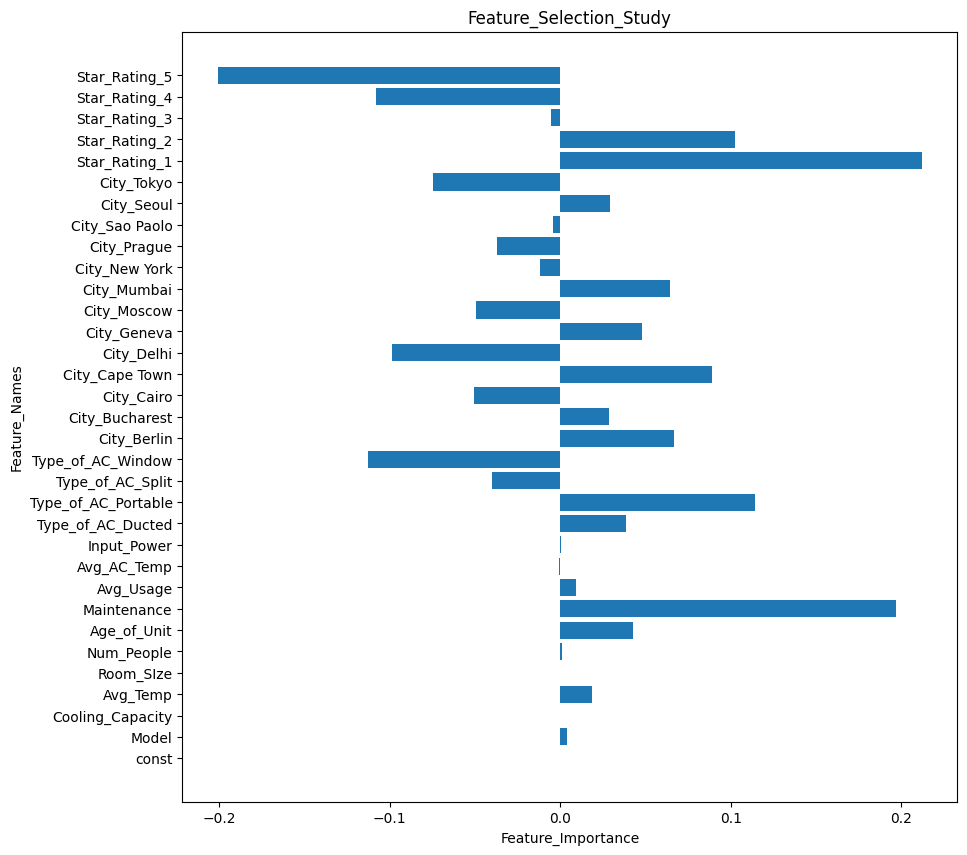

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(regr.feature_names_in_,regr.coef_)
plt.title('Feature_Selection_Study')
plt.xlabel('Feature_Importance')
plt.ylabel('Feature_Names')


### From above we can clearly see that although few parameters are highly correlated, however, very less weightage is given to them. Thus we will try optimize the model

In [ ]:
from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha = 0.5)
reg_ridge.fit(X, Y)
y_pred = reg_ridge.predict(X)

print('Model Score:', metrics.r2_score(Y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))

Model Score: 0.677216898671072
Mean Absolute Error: 0.1817706933553143
Mean Squared Error: 0.04945284571931603
Root Mean Squared Error: 0.22237995799827834


In [ ]:
#Converting the input to Polynomial function
from sklearn.preprocessing import PolynomialFeatures
X = data.drop(['ID','Electricity_Consumption_AC'], axis = 1)
Y = data['Electricity_Consumption_AC']
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

regr = LinearRegression()
regr.fit(X_poly, Y)
y_pred = regr.predict(X_poly)

print('Model Score:', metrics.r2_score(Y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))


Model Score: 0.8058820981444781
Mean Absolute Error: 0.14110168311133112
Mean Squared Error: 0.029740350756578247
Root Mean Squared Error: 0.17245390907885574


In [ ]:
X_poly.shape[1]

6545

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter=1500)
sgdr.fit(X_poly, Y)
#print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

C:\Users\arnchand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [ ]:
y_pred_sgd = sgdr.predict(X_poly)
print('Model Score:', metrics.r2_score(Y, y_pred_sgd))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred_sgd))
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred_sgd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred_sgd)))


Model Score: -6.079017625134088e+68
Mean Absolute Error: 2.1464843814435354e+33
Mean Squared Error: 9.313521045651371e+67
Root Mean Squared Error: 9.650658550405444e+33


The training set was sanitized by filling the missing values taking each city one by one, i.e. select 1 city, then fill missing value of each parameter accordingly. It was observed that Age_of_Unit avg. & Star_Rating mode value did not change with change in city

In [ ]:
#Reading the manually sanitized test data
test_data = pd.read_csv('C:/Users/arnchand/Desktop/Important Doc/Machine-Learning/EDP-Nokia-2022-Files/Assignment-1/New-data-set/dataset/test_modified_v2.csv')
test_data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power
0,191220,Portable,2.1,4283.40,35,3299.605,9,4,5,0,8.770,14.888889,Moscow,2906.044714
1,174111,Split,1.0,2157.10,29,1432.000,12,4,3,0,15.022,12.416667,Moscow,2807.713198
2,614605,Split,3.3,3484.60,31,4372.500,30,4,4,0,18.352,15.033333,Berlin,2723.183862
3,865325,Portable,2.6,1270.08,32,3255.200,9,2,0,0,16.512,15.555556,Cairo,2846.221681
4,134921,Ducted,2.0,4947.60,32,2730.000,24,5,2,1,17.856,11.333333,Delhi,3146.662781


In [ ]:
test_data.shape

(5000, 14)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                  5000 non-null int64
Type_of_AC          5000 non-null object
Model               5000 non-null float64
Cooling_Capacity    5000 non-null float64
Avg_Temp            5000 non-null int64
Room_SIze           5000 non-null float64
Num_People          5000 non-null int64
Star_Rating         5000 non-null int64
Age_of_Unit         5000 non-null int64
Maintenance         5000 non-null int64
Avg_Usage           5000 non-null float64
Avg_AC_Temp         5000 non-null float64
City                4513 non-null object
Input_Power         5000 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 547.0+ KB


In [ ]:
test_data.isnull().sum()

ID                    0
Type_of_AC            0
Model                 0
Cooling_Capacity      0
Avg_Temp              0
Room_SIze             0
Num_People            0
Star_Rating           0
Age_of_Unit           0
Maintenance           0
Avg_Usage             0
Avg_AC_Temp           0
City                487
Input_Power           0
dtype: int64

In [ ]:
test_data['Type_of_AC'] = test_data['Type_of_AC'].replace({'Split':'Split','Ducted':'Ducted','Window':'Window','Portable':'Portable'})

# Convert all categorical variable in Origin into binary column -> Using One Hot Encoding
test_data = pd.get_dummies(test_data, columns = ['Type_of_AC'])
test_data.head(3)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Type_of_AC_Ducted,Type_of_AC_Portable,Type_of_AC_Split,Type_of_AC_Window
0,191220,2.1,4283.4,35,3299.605,9,4,5,0,8.770,14.888889,Moscow,2906.044714,0,1,0,0
1,174111,1.0,2157.1,29,1432.000,12,4,3,0,15.022,12.416667,Moscow,2807.713198,0,0,1,0
2,614605,3.3,3484.6,31,4372.500,30,4,4,0,18.352,15.033333,Berlin,2723.183862,0,0,1,0


In [ ]:
test_data['Star_Rating'] = test_data['Star_Rating'].replace({1:'1',2:'2',3:'3',4:'4',5:'5'})

# Convert all categorical variable in Origin into binary column -> Using One Hot Encoding
test_data = pd.get_dummies(test_data, columns = ['Star_Rating'])
test_data.head(3)

,ID,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,...,Input_Power,Type_of_AC_Ducted,Type_of_AC_Portable,Type_of_AC_Split,Type_of_AC_Window,Star_Rating_1,Star_Rating_2,Star_Rating_3,Star_Rating_4,Star_Rating_5
0,191220,2.1,4283.4,35,3299.605,9,5,0,8.770,14.888889,...,2906.044714,0,1,0,0,0,0,0,1,0
1,174111,1.0,2157.1,29,1432.000,12,3,0,15.022,12.416667,...,2807.713198,0,0,1,0,0,0,0,1,0
2,614605,3.3,3484.6,31,4372.500,30,4,0,18.352,15.033333,...,2723.183862,0,0,1,0,0,0,0,1,0


In [ ]:
X_test = test_data.drop(['ID','City'], axis = 1)

In [ ]:
X_test.shape

(5000, 19)

In [ ]:
X_test.head(3)

,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,Input_Power,Type_of_AC_Ducted,Type_of_AC_Portable,Type_of_AC_Split,Type_of_AC_Window,Star_Rating_1,Star_Rating_2,Star_Rating_3,Star_Rating_4,Star_Rating_5
0,2.1,4283.4,35,3299.605,9,5,0,8.770,14.888889,2906.044714,0,1,0,0,0,0,0,1,0
1,1.0,2157.1,29,1432.000,12,3,0,15.022,12.416667,2807.713198,0,0,1,0,0,0,0,1,0
2,3.3,3484.6,31,4372.500,30,4,0,18.352,15.033333,2723.183862,0,0,1,0,0,0,0,1,0


In [ ]:
X_test = sm.add_constant(X_test) # adding a constant to test data
predictions_test = model.predict(X_test)

C:\Users\arnchand\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred_test = regr.predict(X_test)
print(y_pred_test[:10])

[2.18377544 1.51766204 2.03809942 2.09526219 2.23241054 1.91995887
 2.12717852 2.61748029 2.52068028 2.62848494]


In [ ]:
Submit_data = test_data['ID']
print(Submit_data.shape)
df_submit = pd.DataFrame(Submit_data)

df_submit['Electricity_Consumption_AC'] = y_pred_test

print("length of ID in submission data: ", len(df_submit))
print("length of prediction in submission data:", len(predictions_test))
print(df_submit.head())

(5000,)
length of ID in submission data:  5000
length of prediction in submission data: 5000
       ID  Electricity_Consumption_AC
0  191220                    2.183775
1  174111                    1.517662
2  614605                    2.038099
3  865325                    2.095262
4  134921                    2.232411


In [ ]:
#Exporting the submission data to a new csv
df_submit.to_csv(r'C:/Users/arnchand/Desktop/Important Doc/Machine-Learning/EDP-Nokia-2022-Files/Assignment-1/New-data-set/dataset/Arnab_submit_v3.csv',index=False)